<a href="https://colab.research.google.com/github/tlyonsWIT/Maths-Advanced-Calculus/blob/master/Python%20Workbook%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maths Advanced Calculus 2021 - Python Workbook 5

## Parameterised Paths & Work Elements

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, tan, exp, log, pi, sqrt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

* In this workbook we are going to plot parameterised paths and vector fields along these paths.


* In 2D a parameterisd path is a vector of the form
$$
\vec{r}(t) = r_{1}(t)\hat{\imath} + r_{2}(t)\hat{\jmath},
$$
where the components $r_{1}(t)$ and $r_{2}(t)$ depend on some __parameter__ $t$.


* The parameter $t$ is often interpreted as __time.__

## Example 1

* The simplest parameterised path we can consider is of the form
$$
\vec{r}(t) = (a+ut)\hat{\imath} + (b+vt)\hat{\jmath}.
$$


* This is the path followed by a particle which starts at 
$$
\vec{r}_{0}= a\hat{\imath} + b\hat{\jmath},
$$
when $t=0$. 


* This is often called the __initial position__ of the particle.


* The particle moves with __velocity__
$$
\vec{v}(t) = \frac{d\vec{r}}{dt}=\frac{d}{dt}(a+ut)\hat{\imath}+\frac{d}{dt}(b+vt)\hat{\jmath} = u\hat{\imath}+v\hat{\jmath}\text{ for }0\leq t\leq 5.
$$


* So when $u$ and $v$ are constants, the velocity of the particle is constant, and so the particle does not change its speed or direction as it travels along the path $\vec{r}(t)$, it just keeps moving in the same direction at a constant rate.


* We are going the plot the parameterised path
$$
\vec{r}(t)=(-1.2+2.4t)\hat{\imath}+(3.1-4.2t)\hat{\jmath}.
$$


* We are also going to create an interactive __dot__ to prepresent the particle position at various times along this path.

### Step 1

* We define functions to represent each of the components of the vector field

In [3]:
def r1(t):
    return -1.2+2.4*t


def r2(t):
    return 3.1-4.2*t

### Step 2

* Create a __linspace__ to  represent the full time interval, and plot the parameterise path along this interval

(-20.0, 5.0)

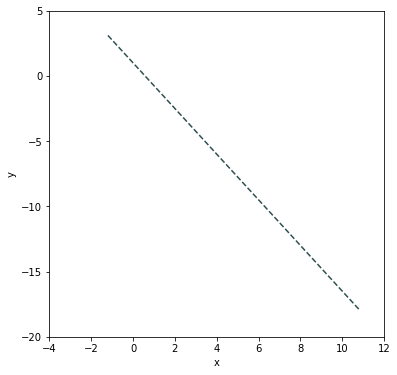

In [4]:
T=np.linspace(0,5,161)
plt.figure(figsize=(6,6))
plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4,12)
plt.ylim(-20,5)

### Step 3

* Use this plot in an interactive plot to create a moving dot along this path

In [5]:
@interact(t=(0,5,0.01))
def MovingPlot1(t=0.0):
    # The following lines are the plot above
    plt.figure(figsize=(6,6))
    plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-4,12)
    plt.ylim(-20,5)
    
    # This line creates a blue dot representing the particle at time t
    plt.plot(r1(t),r2(t),'o',color='cornflowerblue')
    

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, step=0.01), Output()), _dom_classes=('w…

## Example 2

* Create an interactive plot to represent a particle travelling along the parameterised path 

$$
\vec{r}(t)=(1.4+3.4\cos(2\pi t))\hat{\imath} + (2.2+1.4\sin(2\pi t))\hat{\jmath} \text{ for }0\leq t\leq 3.
$$

### Step 1

* We create two functions to represent the components of the parameterised path

In [6]:
def r1(t):
    return 1.4+3.4*cos(2*pi*t)


def r2(t):
    return 2.2 + 1.4*sin(2*pi*t)

### Step 2 & 3

* In this example we are going to combine Step 2 and 3 into a single step:

In [7]:
T=np.linspace(0,3,161)

@interact(t=(0,3,0.01))
def MovingPlot2(t=0.0):
    # The following lines are the plot above
    plt.figure(figsize=(6,6))
    plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-3,5)
    plt.ylim(0,4)
    
    # This line creates a blue dot representing the particle at time t
    plt.plot(r1(t),r2(t),'o',color='cornflowerblue')

interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, step=0.01), Output()), _dom_classes=('w…

## Exercise 1

* Create an interactive plot to represent the parameterised path

$$
\vec{r}(t)=2e^{-t}\cos(2\pi t))\hat{\imath} + 4e^{-t}\sin(2\pi t))\hat{\jmath} \text{ for }0\leq t\leq 2.
$$

# Vector fields along paths 

* We have already seen vector fields $\vec{F}(x,y)$ in 2D space in our previous workbooks.


* As you know, a vector field creates an individual vector at each point $(x,y)$ in the plane. As we move about in the plane, the vector will change its length and direction.


* We can restrict where we evaluate this vector, in particular we can easily plot a vector field along a parameterised path
$$
\vec{r}(t) = r_{1}(t)\hat{\imath} + r_{2}(t)\hat{\jmath}
$$
when we note that $r_{1}(t)$ represents the $x$-coorindate along the path and $r_{2}(t)$ represents the $y$-coordinate along the path.


* It follows, the the vector field $\vec{F}$ restricted to the path $\vec{r}(t)$ is given by

$$
\vec{F}(\vec{r}(t)) = \vec{F}(r_{1}(t),r_{2}(t)).
$$

## Example 3

* Plot the vector field 
$$
\vec{F}(x,y) = xy\hat{\imath}-\frac{x^2+y^2}{5}\hat{\jmath}
$$
along the parameterised path

$$
\vec{r}(t) = 2.3\cos(2\pi t) + 1.1\sin(2\pi t) \text{ for } 0\leq t \leq 1
$$

### Step 1

* Create functions to represent the components of the vector field

In [8]:
def F1(x,y):
    return x*y


def F2(x,y):
    return -(x**2+y**2)/5

### Step 2

* Create functions to represent the components of the parameterised path

In [9]:
def r1(t):
    return 2.3*cos(2*pi*t)


def r2(t):
    return 1.1*sin(2*pi*t)

### Step 3

* Create a linspace to represent the full time interval and plot the full path

(-3.0, 3.0)

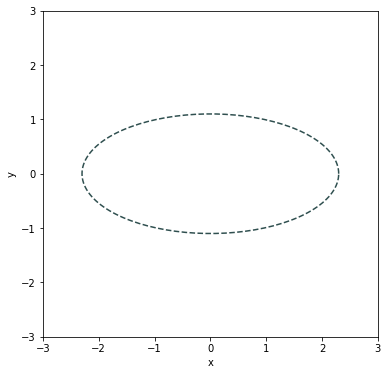

In [10]:
T=np.linspace(0,1,161)
plt.figure(figsize=(6,6))
plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(-3,3)

## Step 4

* Use the __quiver__ function to plot the vector field along the parameterised path

(-3.0, 3.0)

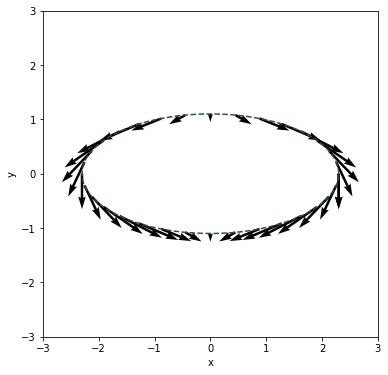

In [11]:
T=np.linspace(0,1,161)
n=5
Tn=T[::n]
plt.figure(figsize=(6,6))
plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
plt.quiver(r1(Tn),r2(Tn),F1(r1(Tn),r2(Tn)),F2(r1(Tn),r2(Tn)),scale=10)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3,3)
plt.ylim(-3,3)

## Alternatively

* Instead of plotting all the vectors simultaneously, we could create an interactive plot to represent the vector as it moves along the path.

In [12]:
T=np.linspace(0,1,161)
@interact(t=(0,1,0.01))
def MovingPlot2(t=0.0):
    # The following lines are the plot above
    plt.figure(figsize=(6,6))
    plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    # This line creates a blue dot representing the particle at time t
    plt.plot(r1(t),r2(t),'o',color='cornflowerblue')
    
    # This line creates a vector which moves with the blue dot
    plt.quiver(r1(t),r2(t),F1(r1(t),r2(t)),F2(r1(t),r2(t)),scale=10)


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Exercise 2

* Create an interactive plot to represent the vector field
$$
\vec{F}(x,y) = 1.4\cos(2y)\hat{\imath} +2.3\sin(x)\hat{\jmath}
$$
along the parameterised path
$$
\vec{r}(t) = e^{-t}\sin(2\pi t) + 1.4e^{-t}\cos(2\pi t) \text{ for }0\leq t\leq 1
$$

# Work Elements

* The work element of a vector field $F(x,y)$ along a parameterised path $r(t)$ is defined as

$$
dW = \vec{F}(\vec{r}(t))\cdot\frac{d\vec{r}}{dt}dt.
$$


* It reresents the __infintessimal__ amount of work done by the __force__ $F(x,y)$ on the particle moving along the path $\vec{r}(t)$ in the infinitessimal amount of time $dt$.


* In lectures we will calculate these explicitly, for now we will try to plot it here in python!!

## Example 4

* Plot the vector field 
$$
\vec{F}(x,y) = 3y\hat{\imath} + x\hat{\jmath},
$$
along the parameterised path
$$
\vec{r}(t) = e^{-0.4t}\cos(3\pi t)\hat{\imath} -e^{-0.4t}\sin(3\pi t) \text{ for }0\leq t \leq 1.
$$

* Plot the __velocity__ vector of the path
$$
\vec{v}(t)=\frac{d\vec{r}}{dt} = e^{-0.4t}(-0.4\cos(3\pi t)-3\pi\sin(3\pi t))\hat{\imath} + e^{-0.4t}(0.4\sin(3\pi t)-3\pi\cos(3\pi t))\hat{\jmath},
$$
on the same plot.


* To make things clearer, you should use different colours for the vector field and the velocity vector. 

### Step 1

* Define the functions for the parameterised path

In [13]:
def r1(t):
    return exp(-0.4*t)*cos(3*pi*t)


def r2(t):
    return -exp(-0.4*t)*sin(3*pi*t)

### Step 2

* Define functions for the velocity vector

In [14]:
def v1(t):
    return exp(-0.4*t)*(-0.4*cos(3*pi*t)-3*pi*sin(3*pi*t))


def v2(t):
    return exp(-0.4*t)*(0.4*sin(3*pi*t)-3*pi*cos(3*pi*t))

### Step 3

* Define functions for the vector (force) field $F(x,y)$

In [15]:
def F1(x,y):
    return 3*y

def F2(x,y):
    return x

### Step 4

* Use the previous plots and add an extra quiver plot for the velocity field

In [16]:
T=np.linspace(0,1,161)
@interact(t=(0,1,0.01))
def MovingPlot2(t=0.0):
    # The following lines are the plot above
    plt.figure(figsize=(6,6))
    plt.plot(r1(T),r2(T),ls='--',color='darkslategray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    
    # This line creates a blue dot representing the particle at time t
    plt.plot(r1(t),r2(t),'o',color='cornflowerblue')
    
    # This line creates an orange vector representing the force F which moves with the blue dot
    plt.quiver(r1(t),r2(t),F1(r1(t),r2(t)),F2(r1(t),r2(t)),scale=10,color='orange')
    
    # This line creates an red vector representing the velocity v which moves with the blue dot
    plt.quiver(r1(t),r2(t),v1(t),v2(t),scale=30,color='red')
    

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Exercise 3

* Plot the vector field 
$$
\vec{F}(x,y) = 0.5(x+y)\hat{\imath} + (2x-y)\hat{\jmath},
$$
along the parameterised path
$$
\vec{r}(t) = e^{-0.8t}\sin(4\pi t)\hat{\imath}+e^{-0.8t}\cos(4\pi t) \text{ for }0\leq t \leq 1.
$$

* Plot the __velocity__ vector of the path
$$
\vec{v}(t)=\frac{d\vec{r}}{dt} = e^{-0.8t}(-0.8\sin(4\pi t)+4\pi\cos(4\pi t))\hat{\imath} + e^{-0.8t}(-0.8\cos(4\pi t)-4\pi\sin(4\pi t))\hat{\jmath},
$$
on the same plot.


* To make things clearer, you should use different colours for the vector field and the velocity vector. 